simpsons_1_3_rule : 1.3674666666666742
simpsons_3_8_rule :  1.519170370370378


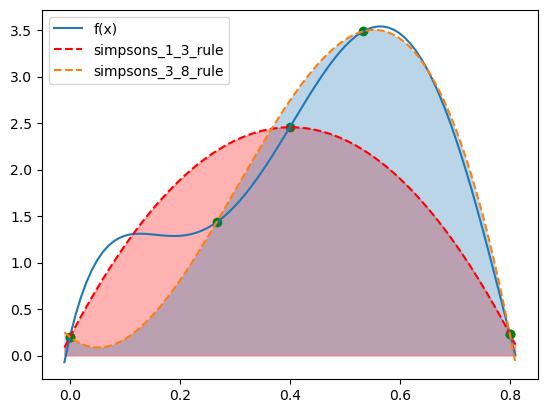

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import math

def fun(x):
  return 0.2 + 25 * x - 200 * x**2 + 675 * x**3 - 900 * x**4 + 400 * x**5

def simpsons_1_3_rule(fun, a, b):
    return (b - a) / 6 * (fun(a) + 4 * fun((a + b) / 2) + fun(b))

def simpsons_3_8_rule(fun, a, b):
    a, b = min(a, b), max(a, b)
    h = (b - a) / 3
    return (3 * h / 8) * (fun(a) + 3 * fun(a + h) + 3 * fun(a + 2 * h) + fun(b))

array = np.arange(-0.01, 0.82, 0.01)

print("simpsons_1_3_rule :", simpsons_1_3_rule(fun, 0, 0.8))

plt.plot(array, fun(array), label="f(x)")
plt.scatter([0, 0.4, 0.8], [fun(0), fun(0.4), fun(0.8)], color='green')
plt.plot(array, CubicSpline([0, 0.4, 0.8], [fun(0), fun(0.4), fun(0.8)])(array), '--', color='red', label='simpsons_1_3_rule')
plt.fill_between(array, CubicSpline([0, 0.4, 0.8], [fun(0), fun(0.4), fun(0.8)])(array), color='red', alpha=0.3)

a, b, c, d = 0, 0.8/3, 0.8/3*2, 0.8
print("simpsons_3_8_rule : ", simpsons_3_8_rule(fun, a, d))

plt.plot(array, CubicSpline([a, b, c, d], [fun(a), fun(b), fun(c), fun(d)])(array), '--', label="simpsons_3_8_rule")
plt.scatter([a, b, c, d], [fun(a), fun(b), fun(c), fun(d)], color='green')
plt.fill_between(array, CubicSpline([a, b, c, d], [fun(a), fun(b), fun(c), fun(d)])(array), alpha=0.3)

plt.legend()
plt.show()
